# Prueba de recomendación

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
from kneed import KneeLocator

## Leer datos

In [2]:
FILE_PATH = "../Data/numerical.csv"
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)
df = df.dropna()
df.head()

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.0,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.0,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.0,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
4,Acer,Liquid X2,Android,3.0,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
5,Acer,Liquid Zest Plus,Android,2.0,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0


In [3]:
df = df.drop('model', axis=1)

## Normaliza columnas de valores numéricos

In [4]:
cols = ['CPU_speed', 'battery_mah', 'approx_price_EUR',
        'primary_camera_mp', 'secondary_camera_mp', 'RAM', 'CPU_cores']

X = df[cols]

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_std= scaler.transform(X)
X_std, X_std.shape

(array([[-0.30171579,  0.46423153, -0.12006156, ..., -0.31228131,
          0.44204575, -0.01755461],
        [-0.30171579,  0.94214649, -0.00769077, ...,  0.64851877,
          1.42489446,  1.74352415],
        [-0.42893215, -0.51971104, -0.1902933 , ..., -0.31228131,
         -0.54080297, -0.01755461],
        ...,
        [-0.5561485 ,  0.8859212 , -0.03578347, ..., -0.31228131,
         -0.54080297, -0.898094  ],
        [-0.04728309,  0.46423153, -0.00769077, ..., -0.76065468,
         -1.02043314, -1.33836369],
        [-1.0650139 , -0.94140071, -0.06387616, ..., -0.95281469,
         -1.02043314, -1.33836369]]),
 (1881, 7))

In [6]:
scaler = MinMaxScaler()
scaler.fit(X)
X_mm= scaler.transform(X)
X_mm, X_mm.shape

(array([[0.48148148, 0.29350649, 0.00519095, ..., 0.1       , 0.31880109,
         0.33333333],
        [0.48148148, 0.35238095, 0.00815721, ..., 0.25      , 0.48910082,
         0.77777778],
        [0.46296296, 0.17229437, 0.00333704, ..., 0.1       , 0.14850136,
         0.33333333],
        ...,
        [0.44444444, 0.34545455, 0.00741565, ..., 0.1       , 0.14850136,
         0.11111111],
        [0.51851852, 0.29350649, 0.00815721, ..., 0.03      , 0.0653951 ,
         0.        ],
        [0.37037037, 0.12034632, 0.00667408, ..., 0.        , 0.0653951 ,
         0.        ]]),
 (1881, 7))

## Clustering y visualización

In [7]:
def pca_plot(X, y):
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'red', 'green', 'darkorange', 'yellow', 'magenta']
    pca = PCA(n_components=2)
    X_pca = pca.fit(X).transform(X)
    target_names = np.unique(y)
    for color, i in zip(colors, target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.4, lw=lw)

In [8]:
def lda_plot(X, y):
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'red', 'green', 'darkorange', 'yellow', 'magenta']
    lda = LDA(n_components=2)
    X_lda = lda.fit(X, y).transform(X)
    target_names = np.unique(y)
    for color, i in zip(colors, target_names):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=.4, lw=lw)

In [9]:
def pca_kmeans(X):
    kmeans = KMeans(random_state=42)
    kmeans.fit(X)
    y = kmeans.labels_
    
    plt.figure(figsize=(20, 10))
    

    pca_plot(X, y)

    plt.title('Visualización de clusters Kmeans usando PCA')
    plt.show()

In [10]:
def lda_kmeans(X):
    kmeans = KMeans(random_state=42)
    kmeans.fit(X)
    y = kmeans.labels_
    
    plt.figure(figsize=(20, 10))

    lda_plot(X, y)

    plt.title('Visualización de clusters Kmeans usando LDA')
    plt.show()

In [11]:
def pca_gmm(X, n_components=5):
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=33,
                                  covariance_type='full')
    gmm.fit(X)
    y = gmm.predict(X)
    
    plt.figure(figsize=(20, 10))

    pca_plot(X, y)

    plt.title('Visualización de clusters GMM usando PCA')
    plt.show()

In [12]:
def lda_gmm(X, n_components=5):
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=33,
                                  covariance_type='full')
    gmm.fit(X)
    y = gmm.predict(X)
    
    plt.figure(figsize=(20, 10))

    lda_plot(X, y)

    plt.title('Visualización de clusters GMM usando LDA')
    plt.show()

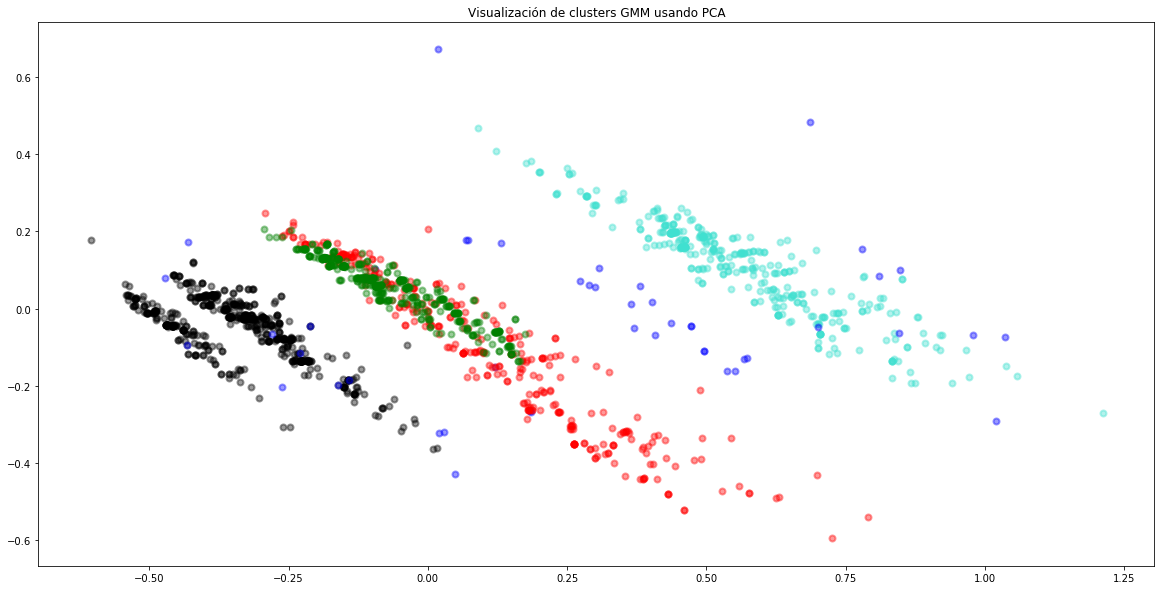

In [13]:
pca_gmm(X_mm, n_components=5)

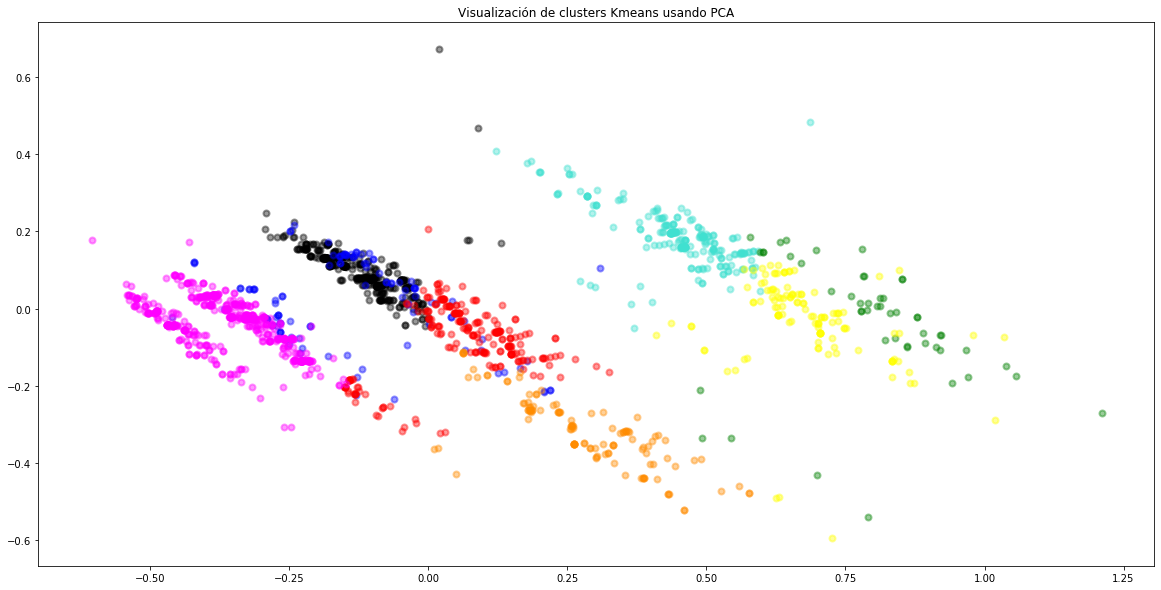

In [14]:
pca_kmeans(X_mm)

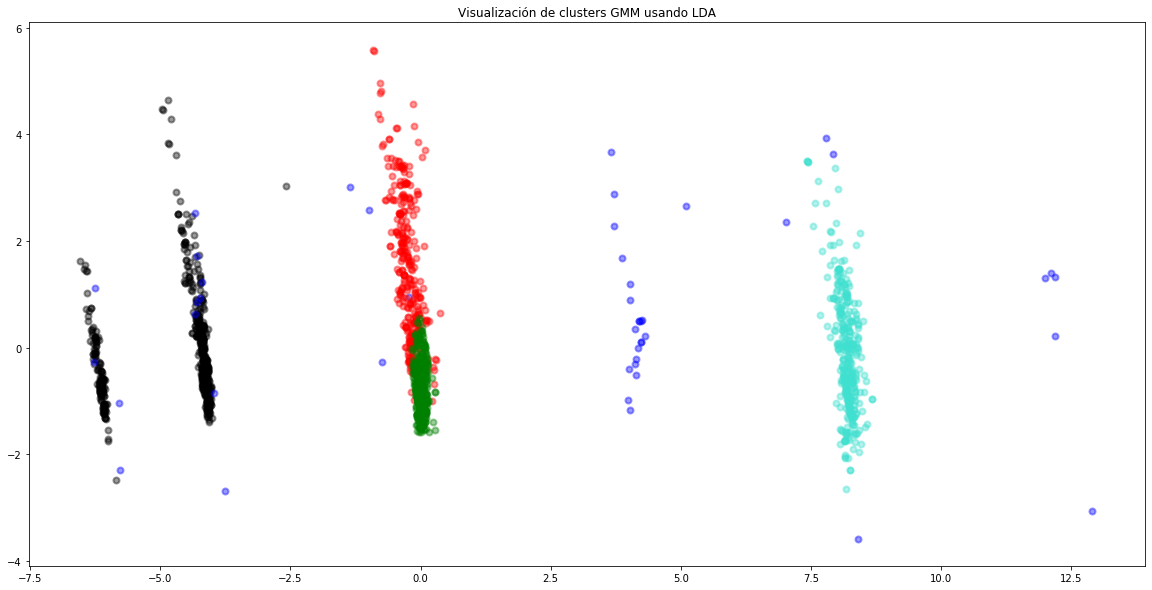

In [15]:
lda_gmm(X_mm, n_components=5)

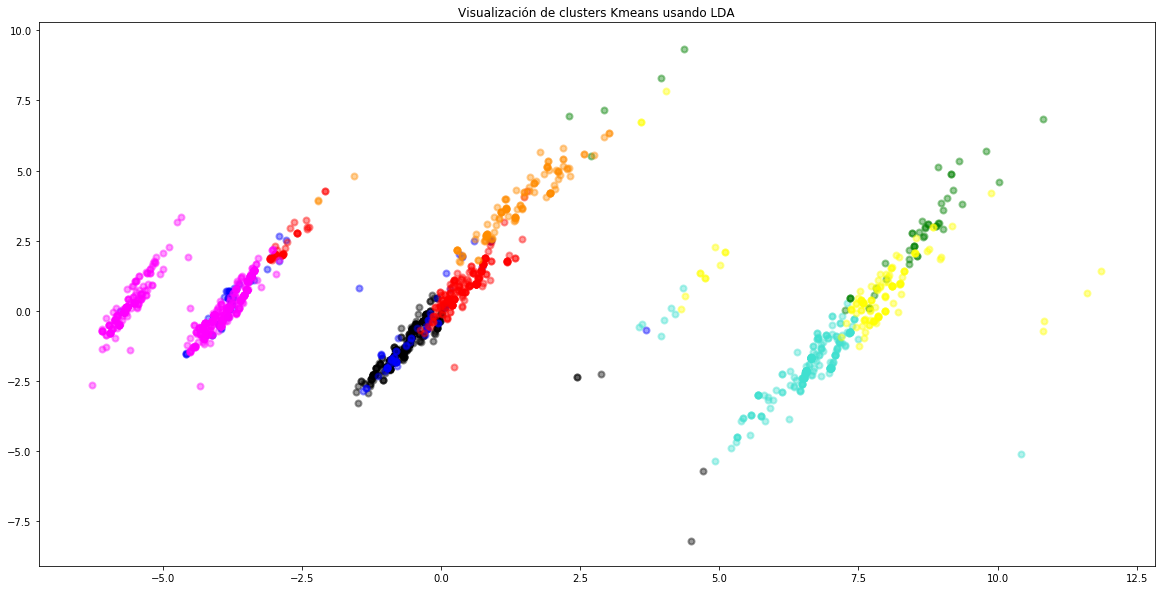

In [16]:
lda_kmeans(X_mm)

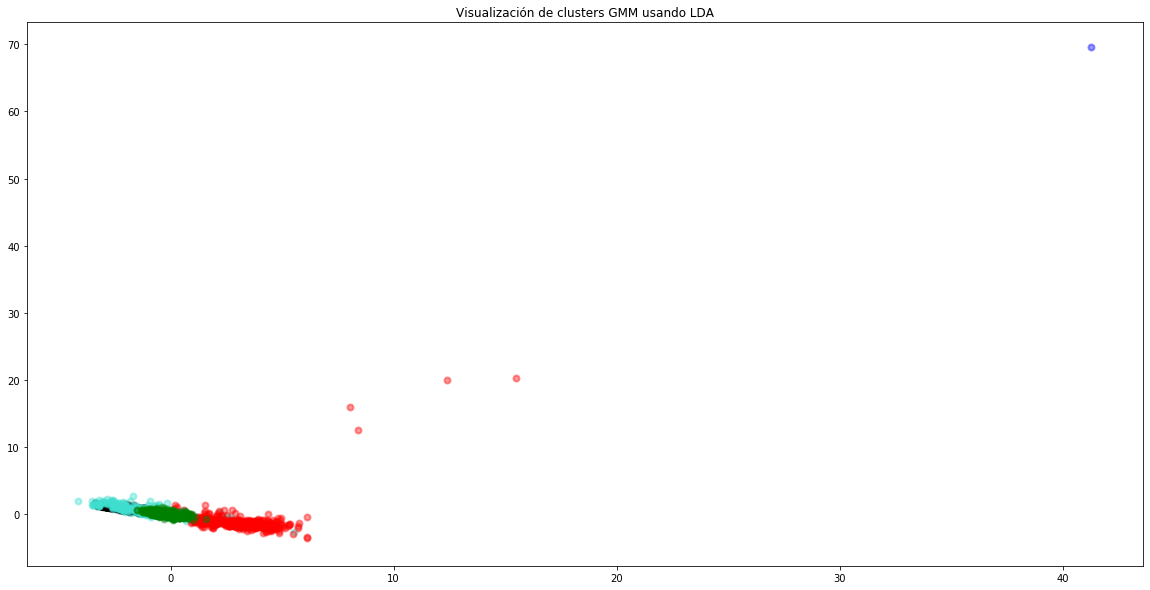

In [17]:
lda_gmm(X_std)

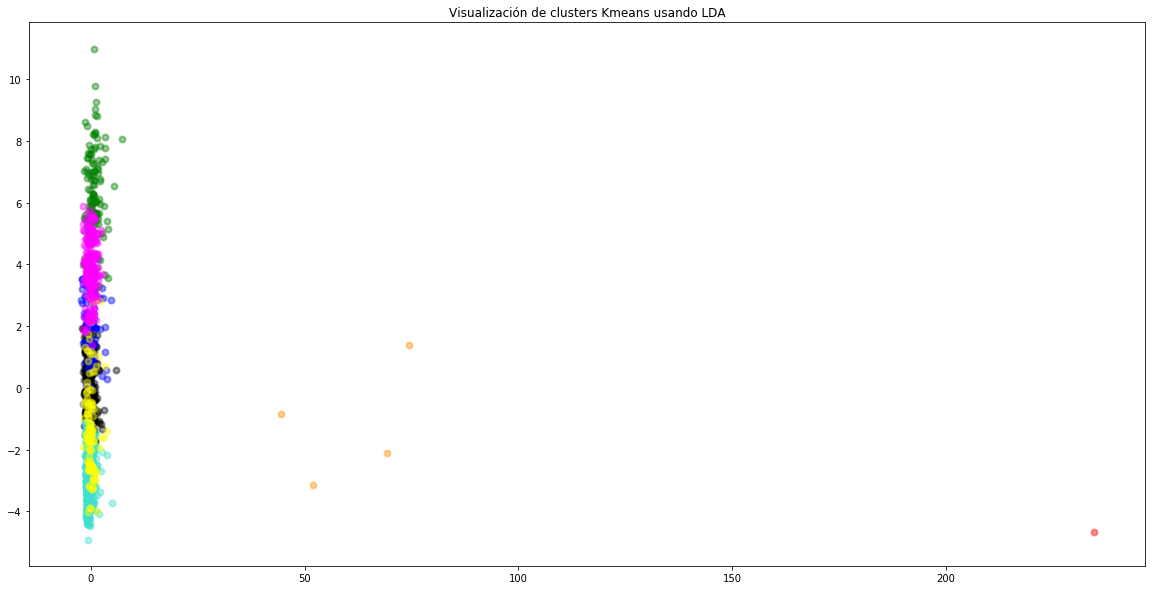

In [18]:
lda_kmeans(X_std)